# Import Library

In [ ]:
!pip install pandas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#File Import from drive

from google.colab import drive
drive.mount('/content/drive')
Fiber="/content/drive/MyDrive/ML Research/ML Fiber Flexure/Fiber Flexural Strength.xlsx"
df=pd.read_excel(Fiber)
df.head(10)


Mounted at /content/drive


,W/C \nRatio,Amount of Coarse \nAggregate \n,Amount of Fine \nAggregate\n,Admixture provided,% of Fiber,Fiber Type,Aspect Ratio (l/d),Fiber tensile strength,Flexural Strength (Mpa)
0,0.36,1.497717,2.367580,1,0.0,0,0.0,0.0,5.94
1,0.36,1.486301,2.349315,1,0.5,3,45.0,1250.0,6.14
2,0.36,1.474886,2.331050,1,1.0,3,45.0,1250.0,6.32
3,0.36,1.463470,2.317352,1,1.5,3,45.0,1250.0,7.75
4,0.36,1.486301,2.349315,1,0.5,3,65.0,1000.0,6.24
5,0.36,1.474886,2.331050,1,1.0,3,65.0,1000.0,8.08
6,0.36,1.463470,2.317352,1,1.5,3,65.0,1000.0,9.33
7,0.36,1.486301,2.349315,1,0.5,3,80.0,1200.0,6.42
8,0.36,1.474886,2.331050,1,1.0,3,80.0,1200.0,9.74
9,0.36,1.463470,2.317352,1,1.5,3,80.0,1200.0,10.76


# Data Split: X Y

In [ ]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
x = pd.DataFrame(x)
y = pd.DataFrame(y)
#print(x.head())
#print(y.head())

# Test_Train Split

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)

# Feature Scaling: Data Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler
sz = StandardScaler()
x_train = sz.fit_transform(x_train)
x_test = sz.transform(x_test)
#print(x_train)
#print(x_test)

In [ ]:
#Feature Count for Adjusted R2
features = list(df.columns.values)
print(features)

#Calling Adjusted R2
def adjustedR2(r2,n,k):
    return r2-(k-1)/(n-k)*(1-r2)

#Calling other necessary Lib
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import pickle

#Evaluation DataFrame
evaluation = pd.DataFrame({'Model': [],
                           'Details':[],
                           'RMSE(train)':[],
                           'R-squared (train)':[],
                           'Adj R-squared (train)':[],
                           'MAE (train)':[],
                           'RMSE (test)':[],
                           'R-squared (test)':[],
                           'Adj R-squared (test)':[],
                           'MAE(test)':[],
                           '10-Fold Cross Validation':[]})

evaluation2 = pd.DataFrame({'Model': [],
                           'Test':[],
                           '1':[],
                           '2':[],
                           '3':[],
                           '4':[],
                           '5':[],
                           '6':[],
                           '7':[],
                           '8':[],
                           '9':[],
                           '10':[],
                           'Mean':[]})

['W/C \nRatio', 'Amount of Coarse \nAggregate \n', 'Amount of Fine \nAggregate\n ', 'Admixture provided', '% of Fiber', 'Fiber Type ', 'Aspect Ratio (l/d)', 'Fiber tensile strength', 'Flexural Strength (Mpa)']


# XGB Regression

In [ ]:
import xgboost as xgb
from xgboost import plot_importance
lr = xgb.XGBRegressor(n_estimators=500, learning_rate=0.05, subsample=0.5,
                           colsample_bytree=0.5, max_depth=4, min_child_weight=2)
y_train_1d = np.ravel(y_train)
y_test_1d = np.ravel(y_test)

lr.fit(x_train, y_train_1d)
y_pred_test = lr.predict(x_test)
y_pred_train = lr.predict(x_train)

# Training set metrics
rmse_train = float(format(np.sqrt(metrics.mean_squared_error(lr.predict(x_train), y_train_1d)), '.3f'))
r2_train = float(format(lr.score(x_train, y_train_1d), '.3f'))
ar2_train = float(format(adjustedR2(lr.score(x_train, y_train_1d), x_train.shape[0], len(features)), '.3f'))
mae_train = float(format(metrics.mean_absolute_error(lr.predict(x_train), y_train_1d), '.3f'))

# Test set metrics
rmse_test = float(format(np.sqrt(metrics.mean_squared_error(lr.predict(x_test), y_test_1d)), '.3f'))
r2_test = float(format(lr.score(x_test, y_test_1d), '.3f'))
ar2_test = float(format(adjustedR2(lr.score(x_test, y_test_1d), x_test.shape[0], len(features)), '.3f'))
mae_test = float(format(metrics.mean_absolute_error(lr.predict(x_test), y_test_1d), '.3f'))


# Cross-validation

In [ ]:
#Cross-validation on the training set
cv = float(format(cross_val_score(lr, x_train, y_train, cv=10).mean(), '.3f'))

cv_train_rmse = cross_val_score(lr, x_train, y_train, cv=10, scoring='neg_root_mean_squared_error')
cv_train_rmse_m = float(format(cross_val_score(lr, x_train, y_train, cv=10, scoring='neg_root_mean_squared_error').mean(), '.3f'))

cv_train_r2 = cross_val_score(lr, x_train, y_train, cv=10, scoring='r2')
cv_train_r2_m = float(format(cross_val_score(lr, x_train, y_train, cv=10, scoring='r2').mean(), '.3f'))

cv_train_ar2 = adjustedR2(cross_val_score(lr, x_train, y_train, cv=10, scoring='r2'), x_train.shape[0], len(features))
cv_train_ar2_m = adjustedR2(cross_val_score(lr, x_train, y_train, cv=10, scoring='r2').mean(), x_train.shape[0], len(features))

cv_train_mae = cross_val_score(lr, x_train, y_train, cv=10, scoring='neg_mean_absolute_error')
cv_train_mae_m = float(format(cross_val_score(lr, x_train, y_train, cv=10, scoring='neg_mean_absolute_error').mean(), '.3f'))

# Cross-validation on the test set
cv_test_rmse = cross_val_score(lr, x_test, y_test, cv=10, scoring='neg_root_mean_squared_error')
cv_test_rmse_m = float(format(cross_val_score(lr, x_test, y_test, cv=10, scoring='neg_root_mean_squared_error').mean(), '.3f'))

cv_test_r2 = cross_val_score(lr, x_test, y_test, cv=10, scoring='r2')
cv_test_r2_m = float(format(cross_val_score(lr, x_test, y_test, cv=10, scoring='r2').mean(), '.3f'))

cv_test_ar2 = adjustedR2(cross_val_score(lr, x_test, y_test, cv=10, scoring='r2'), x_test.shape[0], len(features))
cv_test_ar2_m = adjustedR2(cross_val_score(lr, x_test, y_test, cv=10, scoring='r2').mean(), x_test.shape[0], len(features))

cv_test_mae = cross_val_score(lr, x_test, y_test, cv=10, scoring='neg_mean_absolute_error')
cv_test_mae_m = float(format(cross_val_score(lr, x_test, y_test, cv=10, scoring='neg_mean_absolute_error').mean(), '.3f'))

# Model Evaluation

In [ ]:
r = evaluation2.shape[0]
evaluation2.loc[r] = ['XGB','Train RMSE',float(format(cv_train_rmse[0],'.3f')),float(format(cv_train_rmse[1],'.3f')),float(format(cv_train_rmse[2],'.3f')),float(format(cv_train_rmse[3],'.3f')),float(format(cv_train_rmse[4],'.3f')),float(format(cv_train_rmse[5],'.3f')),float(format(cv_train_rmse[6],'.3f')),float(format(cv_train_rmse[7],'.3f')),float(format(cv_train_rmse[8],'.3f')),float(format(cv_train_rmse[9],'.3f')),float(format(cv_train_rmse_m,'.3f'))]
evaluation2.loc[r+1] = ['XGB','Train R2',float(format(cv_train_r2[0],'.3f')),float(format(cv_train_r2[1],'.3f')),float(format(cv_train_r2[2],'.3f')),float(format(cv_train_r2[3],'.3f')),float(format(cv_train_r2[4],'.3f')),float(format(cv_train_r2[5],'.3f')),float(format(cv_train_r2[6],'.3f')),float(format(cv_train_r2[7],'.3f')),float(format(cv_train_r2[8],'.3f')),float(format(cv_train_r2[9],'.3f')),float(format(cv_train_r2_m,'.3f'))]
evaluation2.loc[r+2] = ['XGB','Train ar2',float(format(cv_train_ar2[0],'.3f')),float(format(cv_train_ar2[1],'.3f')),float(format(cv_train_ar2[2],'.3f')),float(format(cv_train_ar2[3],'.3f')),float(format(cv_train_ar2[4],'.3f')),float(format(cv_train_ar2[5],'.3f')),float(format(cv_train_ar2[6],'.3f')),float(format(cv_train_ar2[7],'.3f')),float(format(cv_train_ar2[8],'.3f')),float(format(cv_train_ar2[9],'.3f')),float(format(cv_train_ar2_m,'.3f'))]
evaluation2.loc[r+3] = ['XGB','Train mae',float(format(cv_train_mae[0],'.3f')),float(format(cv_train_mae[1],'.3f')),float(format(cv_train_mae[2],'.3f')),float(format(cv_train_mae[3],'.3f')),float(format(cv_train_mae[4],'.3f')),float(format(cv_train_mae[5],'.3f')),float(format(cv_train_mae[6],'.3f')),float(format(cv_train_mae[7],'.3f')),float(format(cv_train_mae[8],'.3f')),float(format(cv_train_mae[9],'.3f')),float(format(cv_train_mae_m,'.3f'))]
evaluation2.loc[r+4] = ['XGB','Test RMSE',float(format(cv_test_rmse[0],'.3f')),float(format(cv_test_rmse[1],'.3f')),float(format(cv_test_rmse[2],'.3f')),float(format(cv_test_rmse[3],'.3f')),float(format(cv_test_rmse[4],'.3f')),float(format(cv_test_rmse[5],'.3f')),float(format(cv_test_rmse[6],'.3f')),float(format(cv_test_rmse[7],'.3f')),float(format(cv_test_rmse[8],'.3f')),float(format(cv_test_rmse[9],'.3f')),float(format(cv_test_rmse_m,'.3f'))]
evaluation2.loc[r+5] = ['XGB','Test R2',float(format(cv_test_r2[0],'.3f')),float(format(cv_test_r2[1],'.3f')),float(format(cv_test_r2[2],'.3f')),float(format(cv_test_r2[3],'.3f')),float(format(cv_test_r2[4],'.3f')),float(format(cv_test_r2[5],'.3f')),float(format(cv_test_r2[6],'.3f')),float(format(cv_test_r2[7],'.3f')),float(format(cv_test_r2[8],'.3f')),float(format(cv_test_r2[9],'.3f')),float(format(cv_test_r2_m,'.3f'))]
evaluation2.loc[r+6] = ['XGB','Test ar2',float(format(cv_test_ar2[0],'.3f')),float(format(cv_test_ar2[1],'.3f')),float(format(cv_test_ar2[2],'.3f')),float(format(cv_test_ar2[3],'.3f')),float(format(cv_test_ar2[4],'.3f')),float(format(cv_test_ar2[5],'.3f')),float(format(cv_test_ar2[6],'.3f')),float(format(cv_test_ar2[7],'.3f')),float(format(cv_test_ar2[8],'.3f')),float(format(cv_test_ar2[9],'.3f')),float(format(cv_test_ar2_m,'.3f'))]
evaluation2.loc[r+7] = ['XGB','Train mae',float(format(cv_test_mae[0],'.3f')),float(format(cv_test_mae[1],'.3f')),float(format(cv_test_mae[2],'.3f')),float(format(cv_test_mae[3],'.3f')),float(format(cv_test_mae[4],'.3f')),float(format(cv_test_mae[5],'.3f')),float(format(cv_test_mae[6],'.3f')),float(format(cv_test_mae[7],'.3f')),float(format(cv_test_mae[8],'.3f')),float(format(cv_test_mae[9],'.3f')),float(format(cv_test_mae_m,'.3f')) ]

r = evaluation.shape[0]
evaluation.loc[r] = ['XGB','All features',rmse_train,r2_train,ar2_train,mae_train,rmse_test,r2_test,ar2_test,mae_test,cv]
evaluation.sort_values(by='10-Fold Cross Validation', ascending=False)


,Model,Details,RMSE(train),R-squared (train),Adj R-squared (train),MAE (train),RMSE (test),R-squared (test),Adj R-squared (test),MAE(test),10-Fold Cross Validation
0,XGB,All features,0.232,0.992,0.991,0.157,1.219,0.816,0.803,0.85,0.787


# Cross_Vad Predict

In [ ]:
from sklearn.model_selection import cross_val_predict


# Cross-validation on the training set
cv_train_pred = cross_val_predict(lr, x_train, y_train_1d, cv=10)

# Cross-validation on the test set
cv_test_pred = cross_val_predict(lr, x_test, y_test_1d, cv=10)

# Update the evaluation DataFrame with predicted results
evaluation['Train Predictions'] = [cv_train_pred]
evaluation['Test Predictions'] = [cv_test_pred]

# Print the evaluation DataFrame with predicted results
print(evaluation)

  Model       Details  RMSE(train)  R-squared (train)  Adj R-squared (train)  \
0   XGB  All features        0.232              0.992                  0.991   

   MAE (train)  RMSE (test)  R-squared (test)  Adj R-squared (test)  \
0        0.157        1.219             0.816                 0.803   

   MAE(test)  10-Fold Cross Validation  \
0       0.85                     0.787   

                                   Train Predictions  \
0  [3.851334, 6.1472025, 4.4207673, 7.777785, 4.4...   

                                    Test Predictions  
0  [7.653498, 8.324461, 8.020709, 9.156722, 4.659...  


# SHAP model's predictions on the entire dataset

In [ ]:
!pip install shap

In [ ]:
import shap
x_shap = sz.transform(x)
x_shap = pd.DataFrame(x_shap, columns = x.columns)


In [ ]:
explainer = shap.TreeExplainer(lr)
shap_values = explainer.shap_values(x_shap)

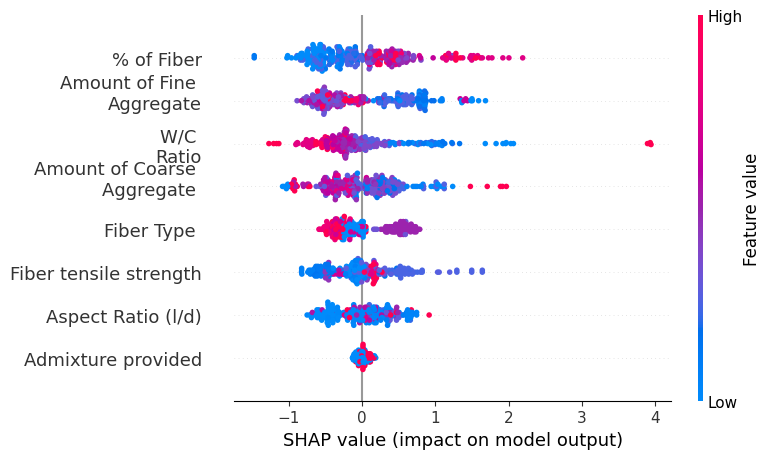

In [ ]:
!pip install shap
import shap
import matplotlib.pyplot as plt
import pandas as pd

# ... (your existing code) ...

# 1. Calculate SHAP values
shap_values = explainer.shap_values(x_shap)

# 2. Convert df to DataFrame if needed
df = pd.DataFrame(df)

# 3. Get feature names from df
feature_names = df.columns.tolist() # Convert to list

# 4. **REMOVE the line that sets the index of x_shap**
# x_shap.index = feature_names  # Remove this line

# 5. Create and customize the summary plot
# Pass feature_names as an argument instead of setting the index
summary_plot = shap.summary_plot(shap_values, x_shap, feature_names=feature_names, show=False)

# ... (rest of your code to customize the plot) ...

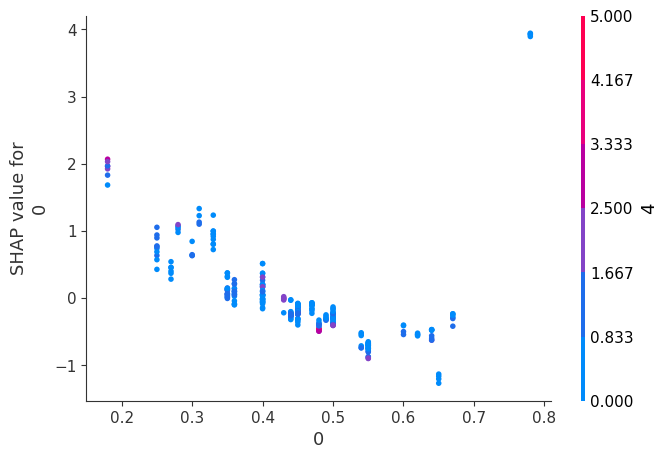

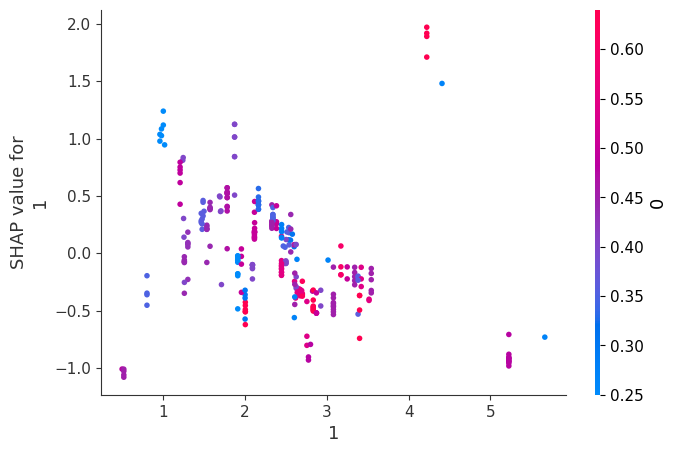

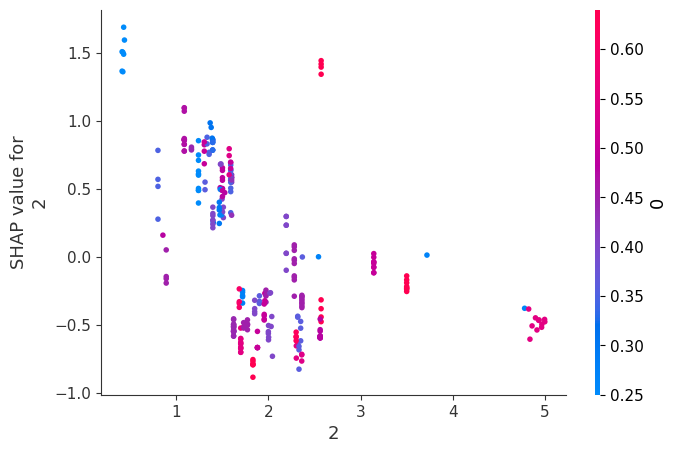

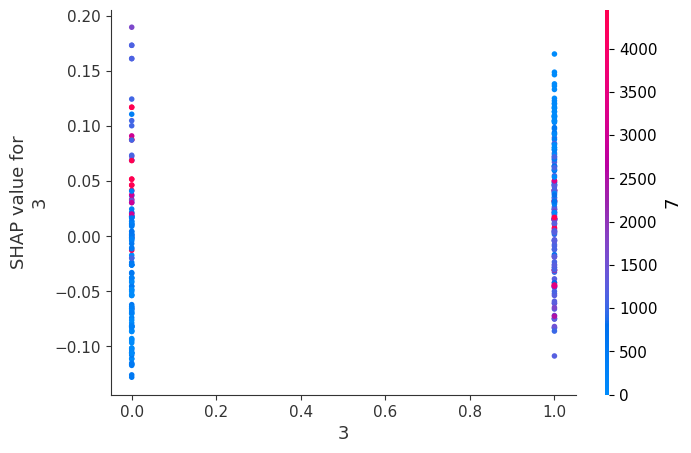

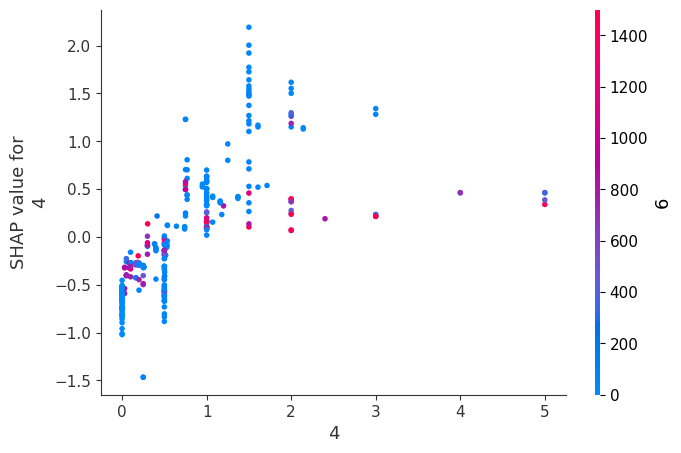

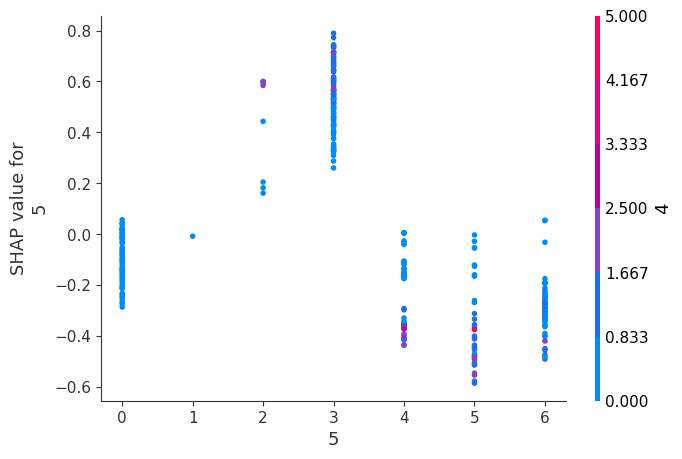

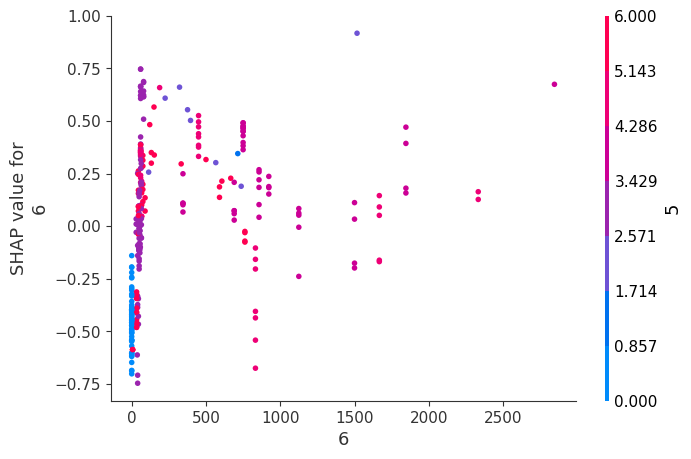

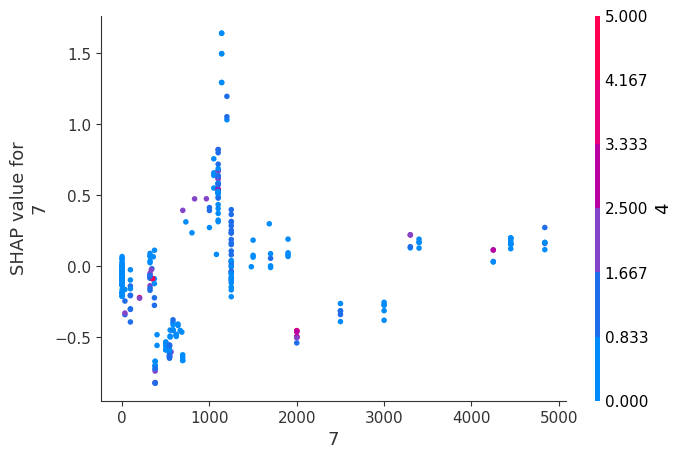

In [ ]:
import shap
import matplotlib.pyplot as plt

# Set the font to Times New Roman
plt.rc('font', family='serif')
plt.rc('font', serif='Times New Roman')

# Plot the dependence plot for class 0
n = 1
for name in x_shap.columns:
    shap.dependence_plot(name, shap_values, x, display_features=x_shap, show=False)

    # Save the plot with a unique filename for each feature
    plt.savefig(f"Graph_Column{n}.jpg", format="jpg", dpi=2000)

    n = n + 1